In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv


In [2]:
df=pd.read_csv('/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')

In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.sample(5)

,Category,Message
1436,ham,Dad went out oredi...
1993,spam,Free tones Hope you enjoyed your new content. ...
1811,ham,"Now, whats your house # again ? And do you hav..."
1756,ham,Really good:)dhanush rocks once again:)
4414,ham,Sad story of a Man - Last week was my b'day. M...


## **Text Preprocesser**
* **Data Preparations**

In [7]:
import re 
import nltk

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# nltk.download()

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
ps=PorterStemmer()
corpus=[]

In [11]:
len(df['Message'])

5572

In [12]:
for i in range(0,len(df['Message'])):
    review=re.sub('[^a-zA-Z]',' ',df['Message'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=' '.join(review)
    corpus.append(review)

In [13]:
##creating the Bag Of Words model 
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv=CountVectorizer(max_features=2500)

In [15]:
X=cv.fit_transform(corpus).toarray()  

In [16]:
y=df['Category']

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

In [18]:
lb=LabelEncoder()

In [19]:
y=lb.fit_transform(y)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt

In [22]:
X_train.shape

(3900, 2500)

In [23]:
GN=GaussianNB()
MN=MultinomialNB()
BN=BernoulliNB()

In [24]:
MN.fit(X_train,y_train)

MultinomialNB()

In [25]:
y_pred_mn=MN.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred_mn)*100

98.14593301435407

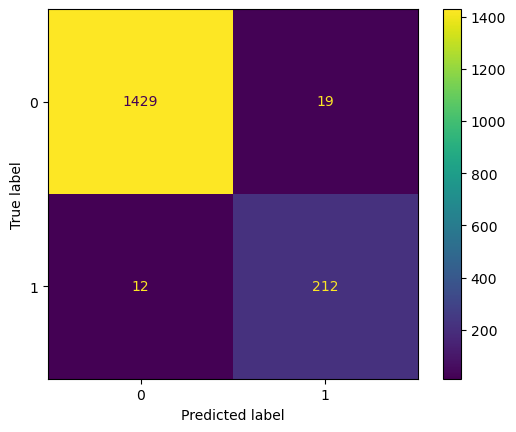

In [27]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_mn)).plot()

In [28]:
BN.fit(X_train,y_train)

BernoulliNB()

In [29]:
y_pred_bn=BN.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred_bn)*100

98.44497607655502

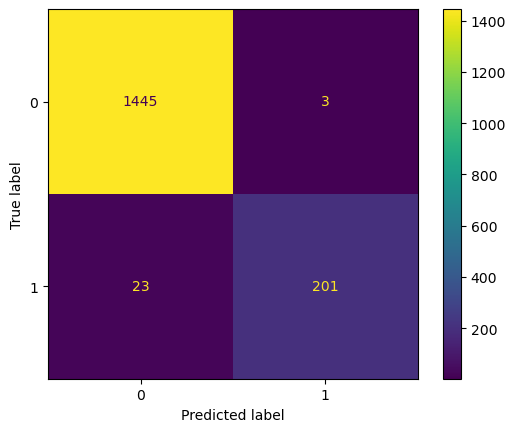

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bn)).plot()

In [32]:
GN.fit(X_train,y_train)

GaussianNB()

In [33]:
y_pred_gn=GN.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred_gn)*100

85.4066985645933

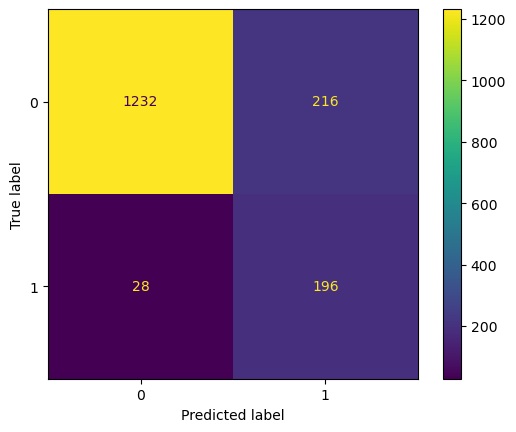

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gn)).plot()

**Hyper Tuning for MultiNomial**

In [36]:
# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Smoothing parameter
    'fit_prior': [True, False]       # Whether to learn class prior probabilities or not
}

In [37]:
# Create a grid search object
gs_mn = GridSearchCV(estimator=MN, param_grid=param_grid, cv=5)

In [38]:
# Fit the grid search to the data
gs_mn.fit(X, y)

# Get the best hyperparameters and the corresponding score
best_params = gs_mn.best_params_
best_score = gs_mn.best_score_

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", best_params)
print("Best Score: ", best_score)

Best Hyperparameters:  {'alpha': 1.0, 'fit_prior': True}
Best Score:  0.9829507853571744


In [39]:
MN=MultinomialNB(alpha=1.0, fit_prior= True)

In [40]:
MN.fit(X_train,y_train)

MultinomialNB()

In [41]:
y_pred_mng=MN.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred_mng)

0.9814593301435407

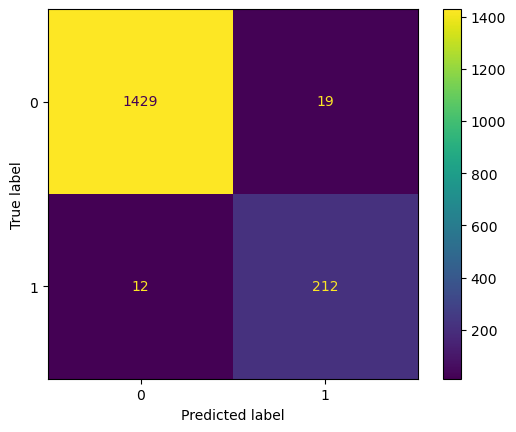

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_mng)).plot()

**ANN Implementation**

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [45]:
model=Sequential()

In [46]:
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [47]:
model.compile(loss=losses.binary_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
callback = callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [49]:
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=500,callbacks=callback)

Epoch 1/50
8/8 [==============================] - 1s 43ms/step - loss: 0.6606 - accuracy: 0.8090 - val_loss: 0.6225 - val_accuracy: 0.9426
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.5894 - accuracy: 0.9554 - val_loss: 0.5561 - val_accuracy: 0.9575
Epoch 3/50
8/8 [==============================] - 0s 12ms/step - loss: 0.5203 - accuracy: 0.9638 - val_loss: 0.4893 - val_accuracy: 0.9665
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4520 - accuracy: 0.9674 - val_loss: 0.4266 - val_accuracy: 0.9683
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3902 - accuracy: 0.9715 - val_loss: 0.3708 - val_accuracy: 0.9713
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.3364 - accuracy: 0.9749 - val_loss: 0.3233 - val_accuracy: 0.9743
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.2907 - accuracy: 0.9782 - val_loss: 0.2837 - val_accuracy: 0.9767
Epoch 8/50
8/8 [===========

In [50]:
y_pred_ann=model.predict(X_test)

53/53 [==============================] - 0s 2ms/step


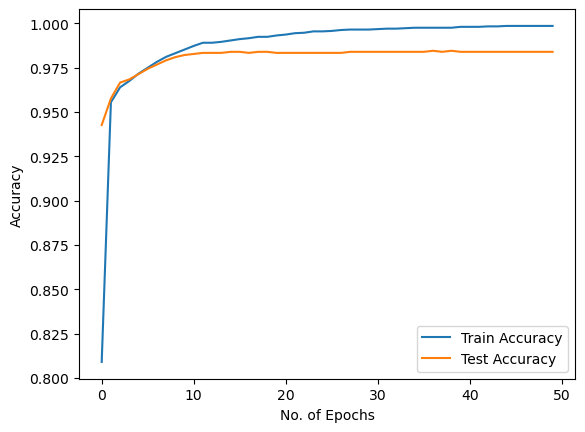

In [51]:
plt.plot(history.history['accuracy'],label="Train Accuracy")
plt.plot(history.history['val_accuracy'],label="Test Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel('Accuracy')
plt.legend()

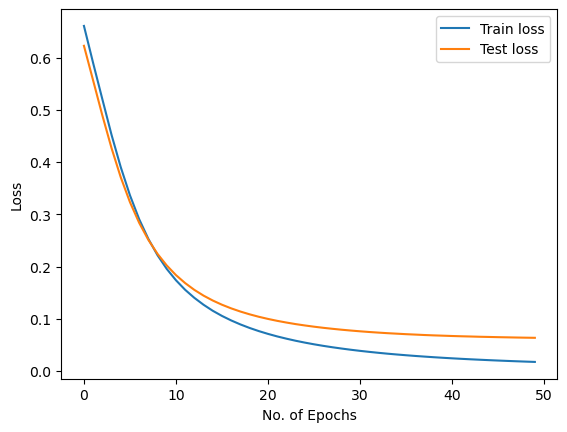

In [52]:
plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'],label="Test loss")
plt.xlabel("No. of Epochs")
plt.ylabel('Loss')
plt.legend()